In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# PARAMETERS
np.random.seed(0)          # For reproducibility
n_train = 30               # Number of training points per dataset
n_test = 100               # Number of points for test grid
noise_std = 0.3            # Standard deviation of Gaussian noise in data
degrees = range(1, 16)     # Polynomial degrees to test
n_repeats = 50             # Number of random training datasets to average over

# TRUE FUNCTION on which we will base our synthetic data
def f(x):
    return np.sin(2 * np.pi * x)

# STORAGE
results = []

In [4]:
# %% SIMULATION
for degree in degrees:
    preds_all = []  # Store predictions for each dataset (to compute variance)
    y_test_all = [] # Store true outputs (for bias calculation)
    
    for _ in range(n_repeats):
        # Training data
        X_train = np.random.rand(n_train, 1)
        y_train = f(X_train).ravel() + noise_std * np.random.randn(n_train)
        
        # Test data (fixed grid)
        X_test = np.linspace(0, 1, n_test).reshape(-1, 1)
        y_test = f(X_test).ravel() + noise_std * np.random.randn(n_test)
        
        # Polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Predict on the clean grid (without noise for bias/variance calculation)
        y_pred_clean = model.predict(poly.transform(X_test))
        
        preds_all.append(y_pred_clean)
        y_test_all.append(f(X_test).ravel())
    
    # Convert to arrays
    preds_all = np.array(preds_all)
    y_true_all = np.array(y_test_all)
    
    # Bias²: average squared difference between mean prediction and true function
    mean_pred = preds_all.mean(axis=0)
    bias2 = np.mean((mean_pred - f(X_test).ravel()) ** 2)
    
    # Variance: average variance of predictions across datasets
    variance = np.mean(np.var(preds_all, axis=0))
    
    # Noise: known from generation process
    noise = noise_std ** 2
    
    # Expected test MSE ≈ bias² + variance + noise
    results.append({
        "Degree": degree,
        "Bias^2": bias2,
        "Variance": variance,
        "Noise": noise,
        "Expected Test MSE": bias2 + variance + noise
    })


    Degree        Bias^2      Variance  Noise  Expected Test MSE
0        1  2.033500e-01  2.323862e-02   0.09       3.165886e-01
1        2  2.037883e-01  3.696779e-02   0.09       3.307560e-01
2        3  6.045824e-03  2.648195e-02   0.09       1.225278e-01
3        4  5.661982e-03  2.683720e-02   0.09       1.224992e-01
4        5  1.906903e-03  5.922069e-02   0.09       1.511276e-01
5        6  1.399061e-03  1.330307e-01   0.09       2.244297e-01
6        7  8.828121e-03  3.919414e-01   0.09       4.907696e-01
7        8  7.153249e-02  1.192302e+00   0.09       1.353834e+00
8        9  1.785412e-02  4.962632e+00   0.09       5.070486e+00
9       10  2.638267e+00  5.310284e+01   0.09       5.583111e+01
10      11  1.510295e+00  8.309213e+02   0.09       8.325216e+02
11      12  6.650512e+02  2.660071e+04   0.09       2.726585e+04
12      13  8.820464e+02  4.289334e+04   0.09       4.377548e+04
13      14  2.803124e+04  5.295153e+07   0.09       5.297957e+07
14      15  1.381699e+09 

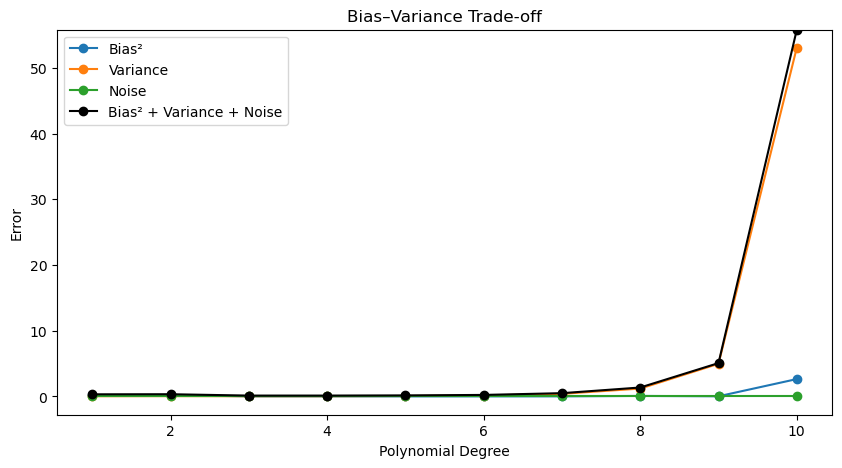

In [7]:
# RESULTS TABLE
df_results = pd.DataFrame(results)
print(df_results)
df_plot = df_results[df_results["Degree"] <= 10]

# PLOTS
plt.figure(figsize=(10, 5))
plt.plot(df_plot["Degree"], df_plot["Bias^2"], label="Bias²", marker="o")
plt.plot(df_plot["Degree"], df_plot["Variance"], label="Variance", marker="o")
plt.plot(df_plot["Degree"], df_plot["Noise"], label="Noise", marker="o")
plt.plot(df_plot["Degree"], df_plot["Expected Test MSE"], label="Bias² + Variance + Noise", marker="o", color="black")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.ylim(top=55.83111) 
plt.title("Bias–Variance Trade-off")
plt.legend()
plt.show()
